##### 플로이드 워셜 알고리즘
- 모든 노드에서 다른 모든 노드까지의 최단 경로를 모두 계산한다
- 플로이드 워셜(Floyd-Warshall) 알고리즘은 다익스트라 알고리즘과 마찬가지로 단계별로 거쳐 가는 노드를 <br>기준으로 알고리즘을 수행한다
    - 다만 매 단계마다 방문하지 않은 노드 중에 최단 거리를 갖는 노드를 찾는 과정이 필요하지 않다
- 플로이드 워셜은 2차원 테이블에 최단 거리 정보를 저장한다
- 플로이드 워셜 알고리즘은 다이나믹 프로그래밍 유형에 속한다
- 각 단계마다 특정한 노드 𝑘를 거쳐 가는 경우를 확인한다
    - 𝑎에서 𝑏로 가는 최단 거리보다 𝑎에서 𝑘를 거쳐 𝑏로 가는 거리가 더 짧은지 검사한다
점화식은 다음과 같다

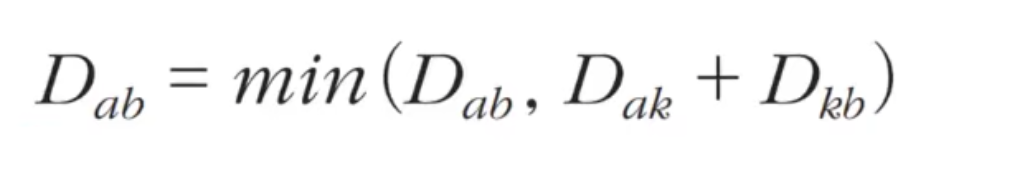

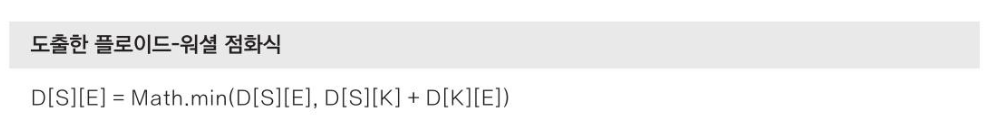

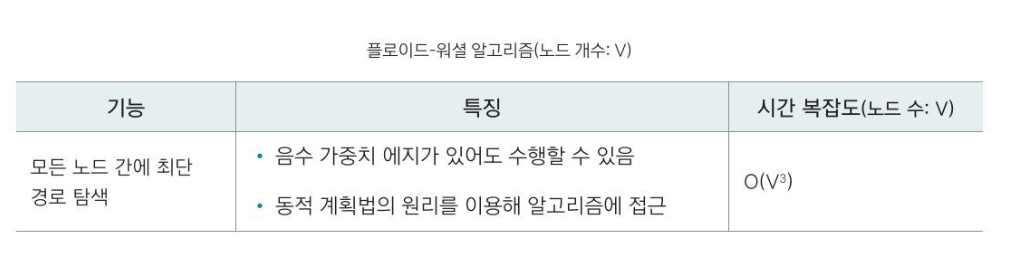

##### 플로이드 워셜 알고리즘: 동작 과정

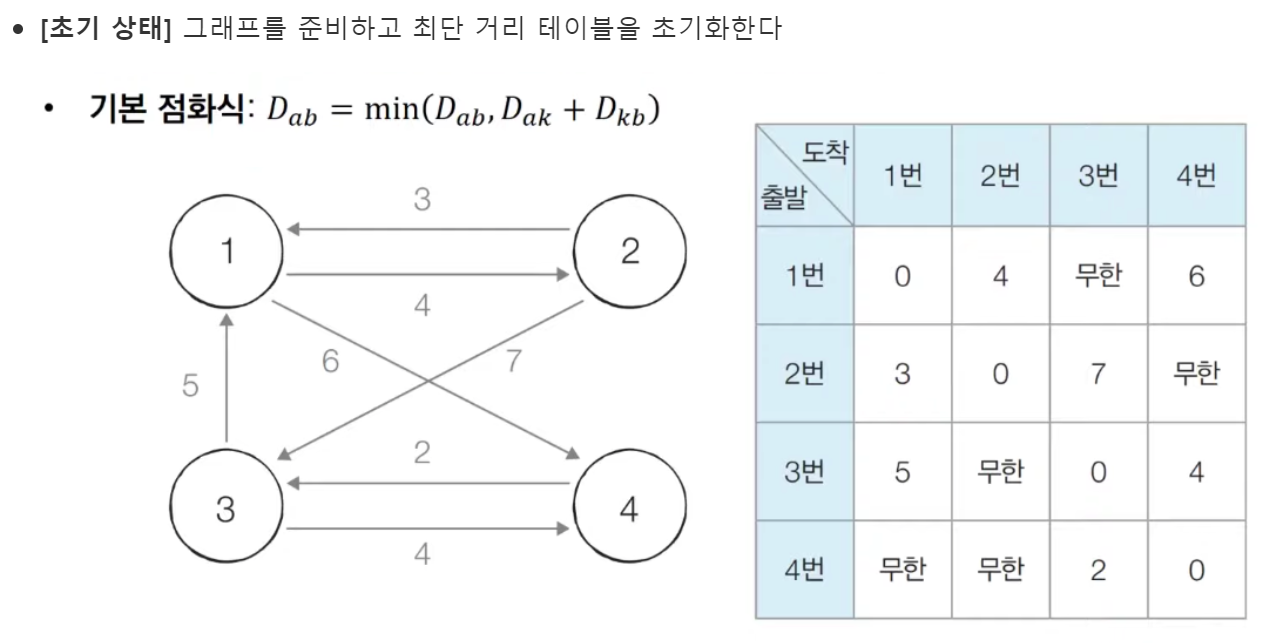

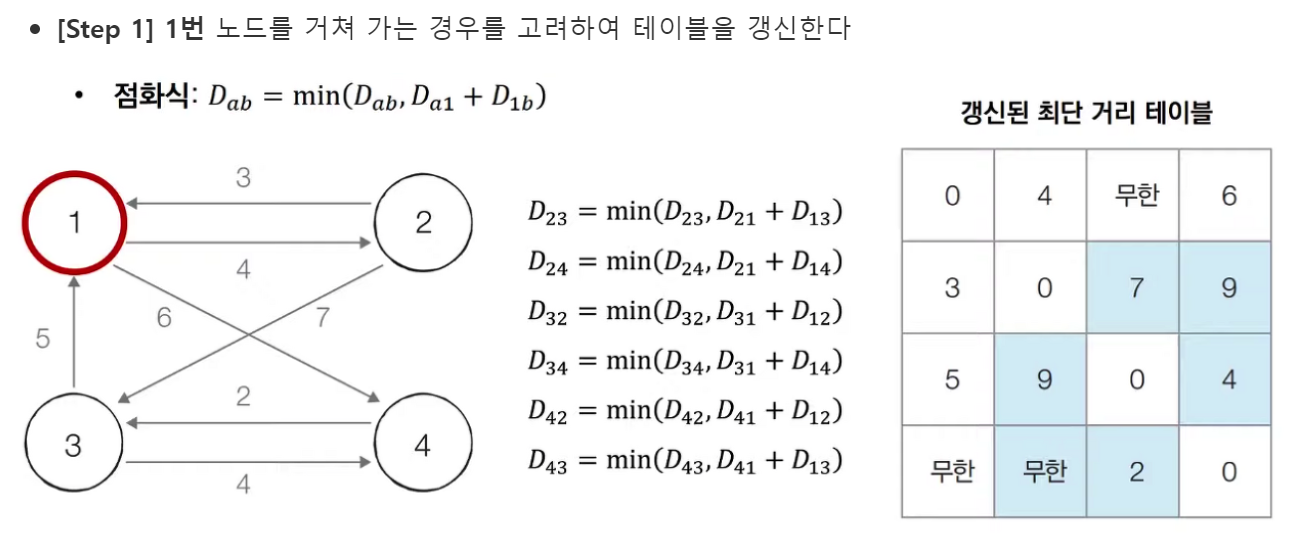

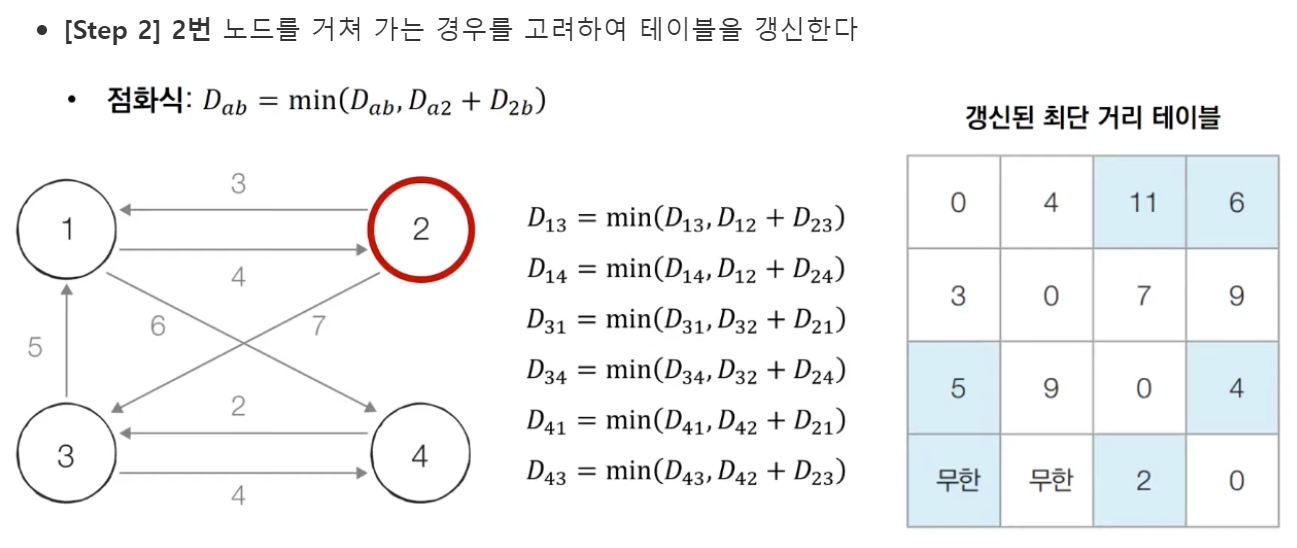

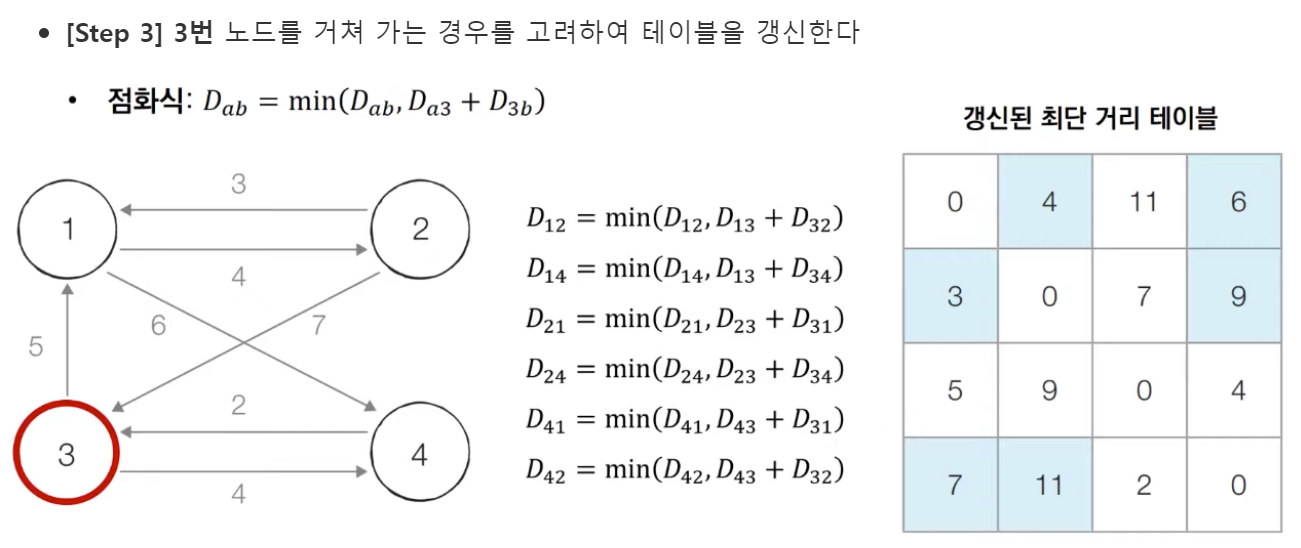

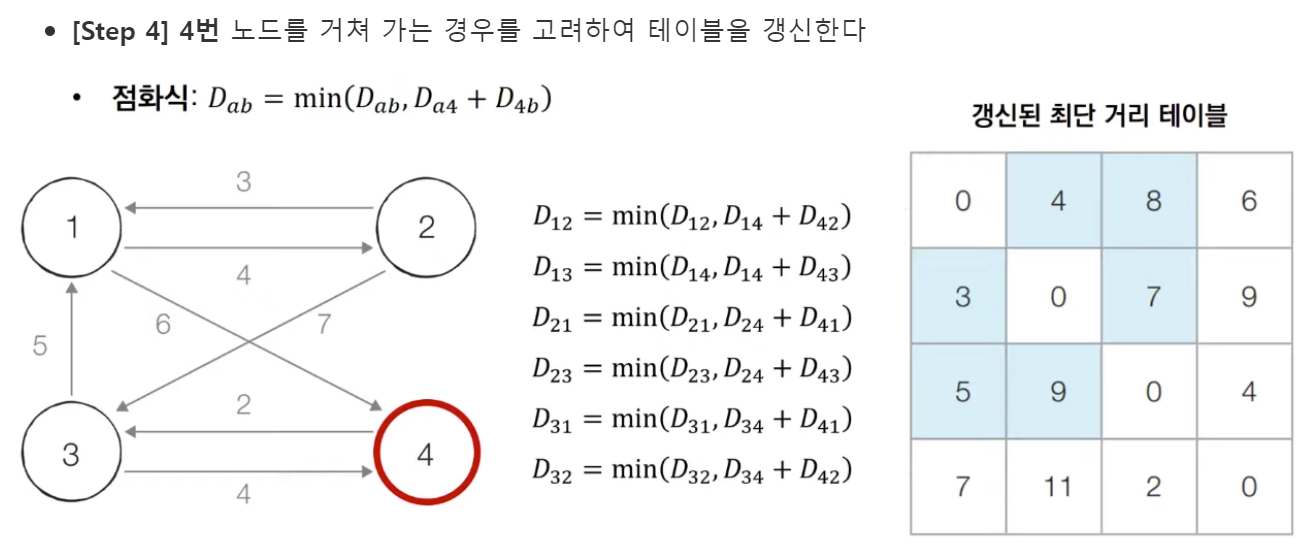

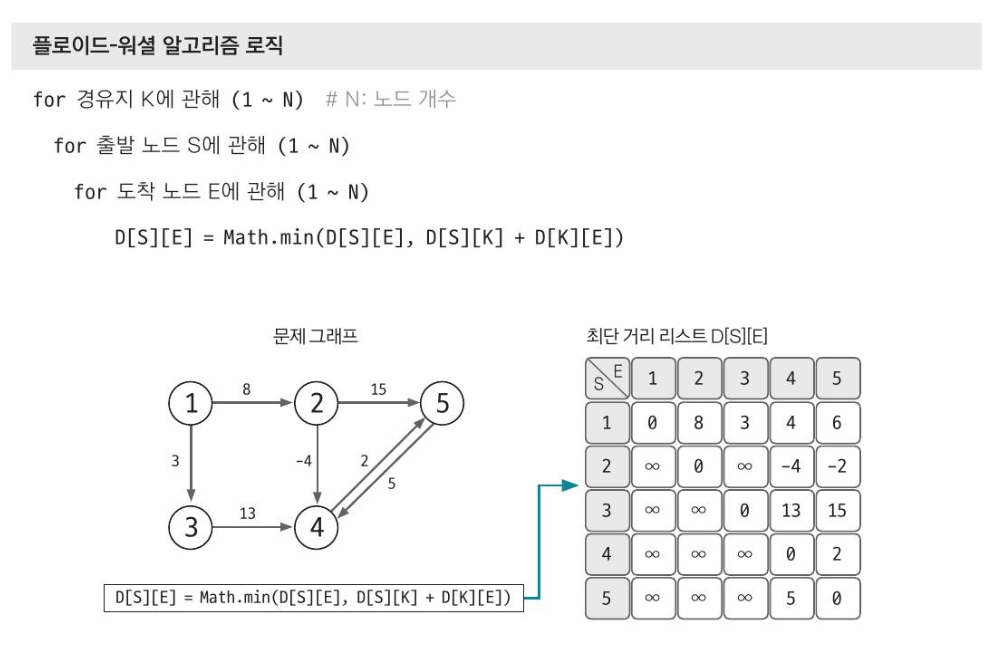

In [2]:
# 코드 입력

import sys

n = int(input()) # 노드의 개수(도시 개수)
m = int(input()) # 간선의 개수(버스 노선의 개수)

distances = [[sys.maxsize] * (n+1) for _ in range(n+1)] # 최단 거리 테이블을 모두 무한으로 초기화

# 자기 자신으로 가는 거리를 0으로 초기화
for i in range(1, n+1):
    distances[i][i] = 0
    
# 각 간선에 대한 정보를 입력받아 테이블로 저장
for _ in range(m):
    s, e, k = map(int, input().split()) # 시작 도시, 도착 도시, 이동 거리
    if k < distances[s][e]:
        distances[s][e] = k
        
# 플로이드-워셜 알고리즘 수행
for k in range(1, n+1): # 거쳐가는 노드
    for i in range(1, n+1): # 출발 노드
        for j in range(1, n+1): # 도착 노드
            # distances[i][j] = min(distances[i][j], distances[i][k] + distances[k][j])
            if distances[i][j] > distances[i][k] + distances[k][j]:
                distances[i][j] = distances[i][k] + distances[k][j]
                
# 결과 출력
for i in range(1, n+1): # i 번째 도시에서
    for j in range(1, n+1): # j 번째 도시로 가는 최단 거리
        if distances[i][j] == sys.maxsize: # 도달할 수 없는 경우
            print('INF', end=' ')
        else:
            print(distances[i][j], end=' ')
    print() # 줄 바꿈


0 8 3 4 6 
9223372036854775803 0 9223372036854775803 -4 -2 
INF INF 0 13 15 
INF INF INF 0 2 
INF INF INF 5 0 


##### 플로이드 워셜 알고리즘 성능 분석
- 노드의 개수가 𝑁개일 때 알고리즘상으로 𝑁번의 단계를 수행한다
    - 각 단계마다 O(N²) 의 연산을 통해 현재 노드를 거쳐 가는 모든 경로를 고려한다
- 따라서 플로이드 워셜 알고리즘의 총 시간 복잡도는 O(N³) 이다

#### [문제] 가장 빠른 버스 노선 구하기

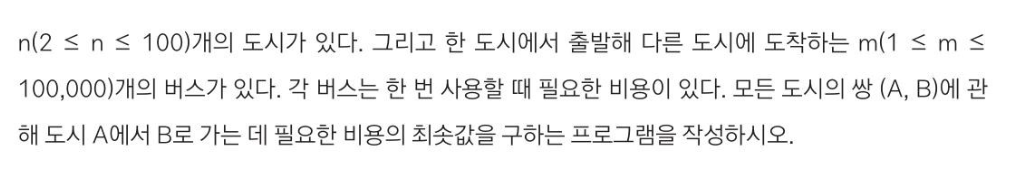

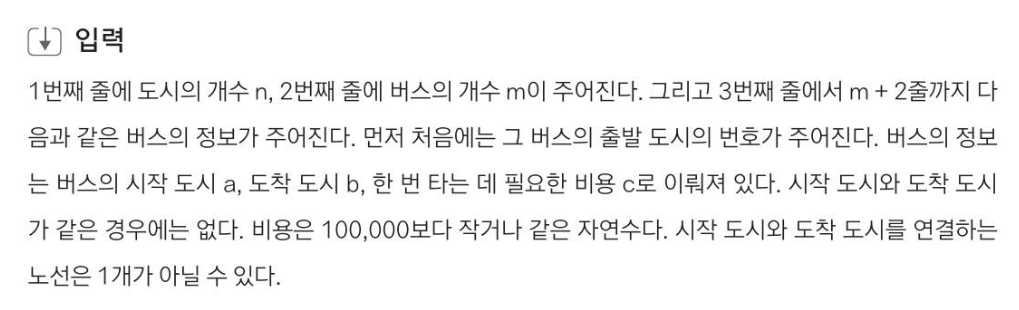

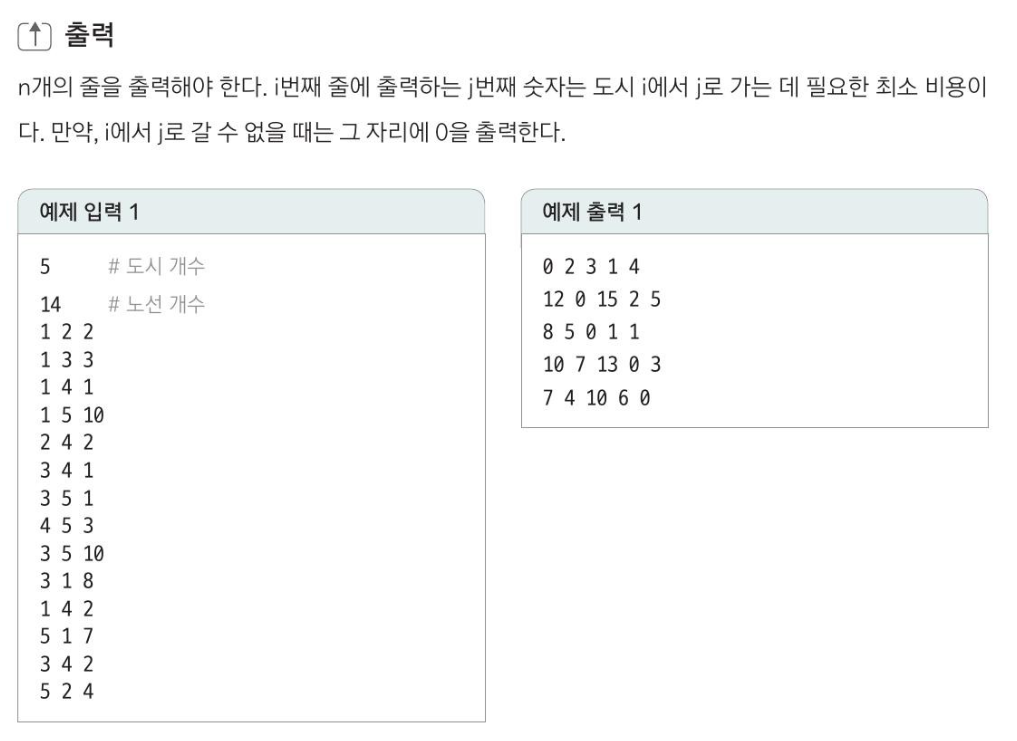

##### 풀이 방법

1. 버스 비용 정보를 인접 행렬에 저장한다. 
- 먼저 인접 행렬을 초기화 한다. 
- 연결 도시가 같으면(i == j) 0, 아니면 충분히 큰 수로 값을 초기화하면 된다. 
- 그리고 주어진 버스 비용 데이터값을 인접 행렬에 저장한다.

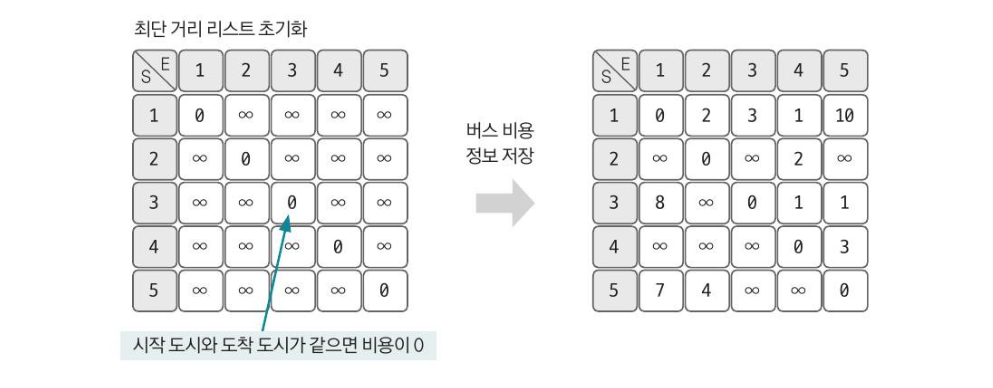

2. 플로이드-워셜 알고리즘을 수행한다. 
- 다음 점화식을 활용한 3중 for 문으로 모든 중간 경로를 탐색한다.

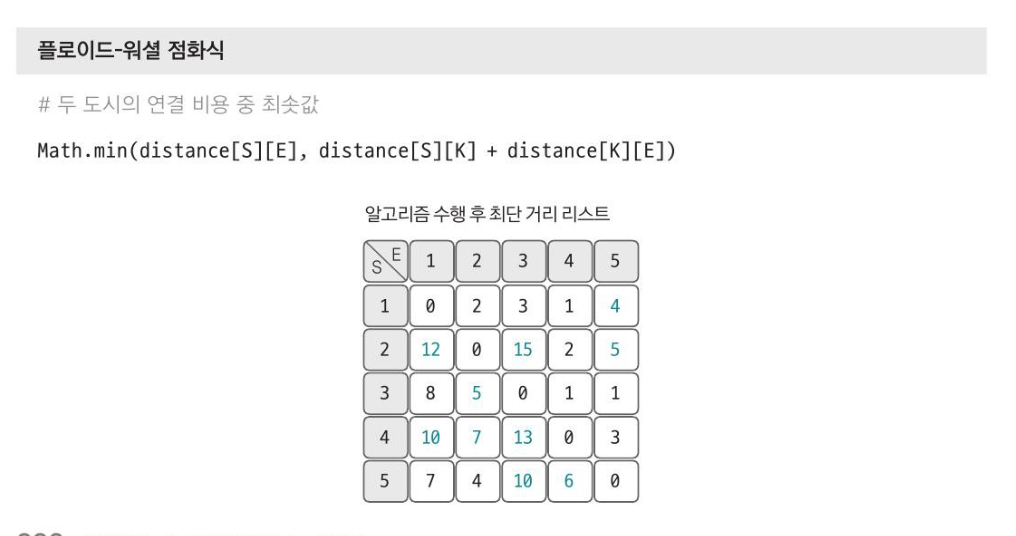

3. 알고리즘으로 변경된 인접 행렬을 출력한다. 
- 인접 행렬 자체가 모든 쌍의 최단 경로를 나타내는 정답 리스트이다.
- 정답 리스트를 그대로 출력하되, 문제의 요구사항에 따라 두 도시가 도달하지 못할 때(∞)는 0, 아닐 때는 리스트의 값을 출력한다.

In [ ]:
# 코드 구현

INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

n = int(input()) # 도시 개수
m = int(input()) # 버스 노선 개수

# 2차원 리스트(그래프 표현)를 만들고, 모든 값을 무한으로 초기화
graph = [[INF]*(n+1) for _ in range(n+1)] 

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n+1):
    for b in range(1, n+1):
        if a == b:
            graph[a][b] = 0
            
# 각 간선에 대한 정보 입력 받아 그래프(리스트)에 저장
for _ in range(m):
    # A에서 B로 가는 비용은 C라고 설정(시작 도시, 도착 도시, 비용)
    a, b, c = map(int, input().split())
    graph[a][b] = c
    
# 플로이드-워셜 알고리즘 수행
for k in range(1, n+1): # k: 거쳐가는 노드
    for a in range(1, n+1): # a: 출발 노드
        for b in range(1, n+1): # b: 도착 노드
            graph[a][b] = min(graph[a][b], graph[a][k]+graph[k][b])
            
# 수행된 결과를 출력
for a in range(1, n+1): 
    for b in range(1, n+1):
        if graph[a][b] == INF:
            print('INF', end=' ')
        else:
            print(graph[a][b], end=' ')
    print()
           